In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [125]:
train_data = pd.read_pickle('train.pkl',compression='bz2')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [105]:
test_data = pd.read_csv('test.csv',parse_dates=['date'],dtype={'family':'category'})
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           28512 non-null  int64         
 1   date         28512 non-null  datetime64[ns]
 2   store_nbr    28512 non-null  int64         
 3   family       28512 non-null  category      
 4   onpromotion  28512 non-null  int64         
dtypes: category(1), datetime64[ns](1), int64(3)
memory usage: 919.2 KB


In [111]:
holiday_data = pd.read_csv('holidays_events.csv',parse_dates=['date'],dtype={'type':'category','locale':'category'})
holiday_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         350 non-null    datetime64[ns]
 1   type         350 non-null    category      
 2   locale       350 non-null    category      
 3   locale_name  350 non-null    object        
 4   description  350 non-null    object        
 5   transferred  350 non-null    bool          
dtypes: bool(1), category(2), datetime64[ns](1), object(2)
memory usage: 9.7+ KB


In [115]:
oil_data = pd.read_csv('oil.csv',parse_dates=['date'])
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1218 non-null   datetime64[ns]
 1   dcoilwtico  1175 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 19.2 KB


In [117]:
trans_data = pd.read_csv('transactions.csv',parse_dates=['date'])
trans_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   date          83488 non-null  datetime64[ns]
 1   store_nbr     83488 non-null  int64         
 2   transactions  83488 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.9 MB


In [122]:
stores_data = pd.read_csv('stores.csv',dtype={'type':'category','cluster':'category'})
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   store_nbr  54 non-null     int64   
 1   city       54 non-null     object  
 2   state      54 non-null     object  
 3   type       54 non-null     category
 4   cluster    54 non-null     category
dtypes: category(2), int64(1), object(2)
memory usage: 2.4+ KB


<Axes: xlabel='date', ylabel='sales'>

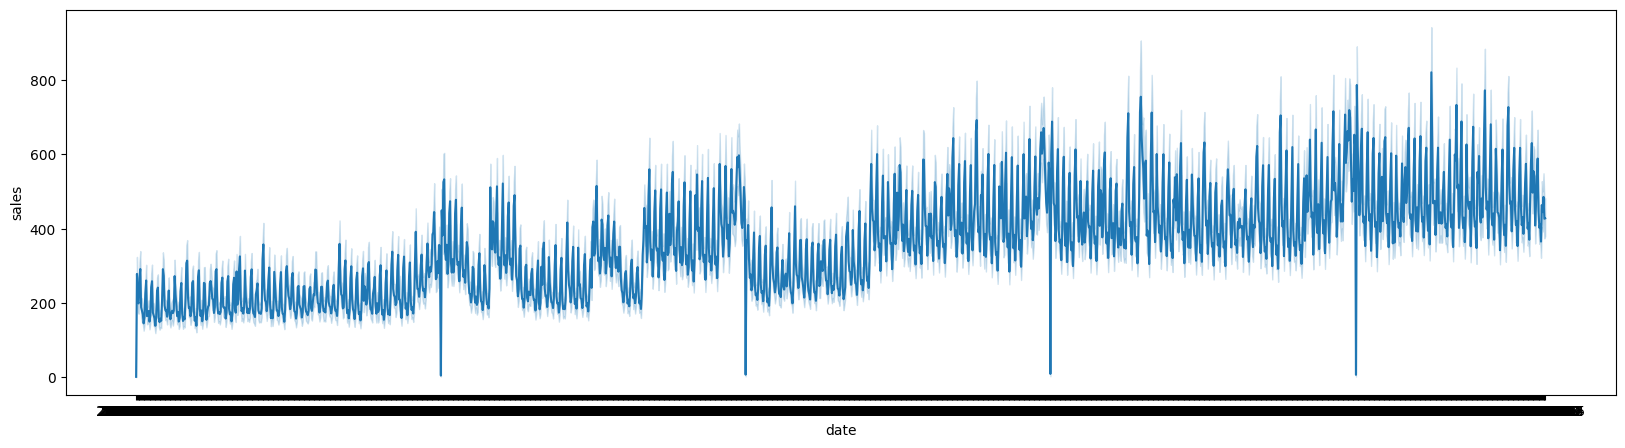

In [4]:
plt.figure(figsize=(20,5))
sns.lineplot(x='date',y='sales',data=train_data)

In [10]:
df = train_data[['date','sales']].groupby('date').sum()

<Axes: xlabel='date', ylabel='sales'>

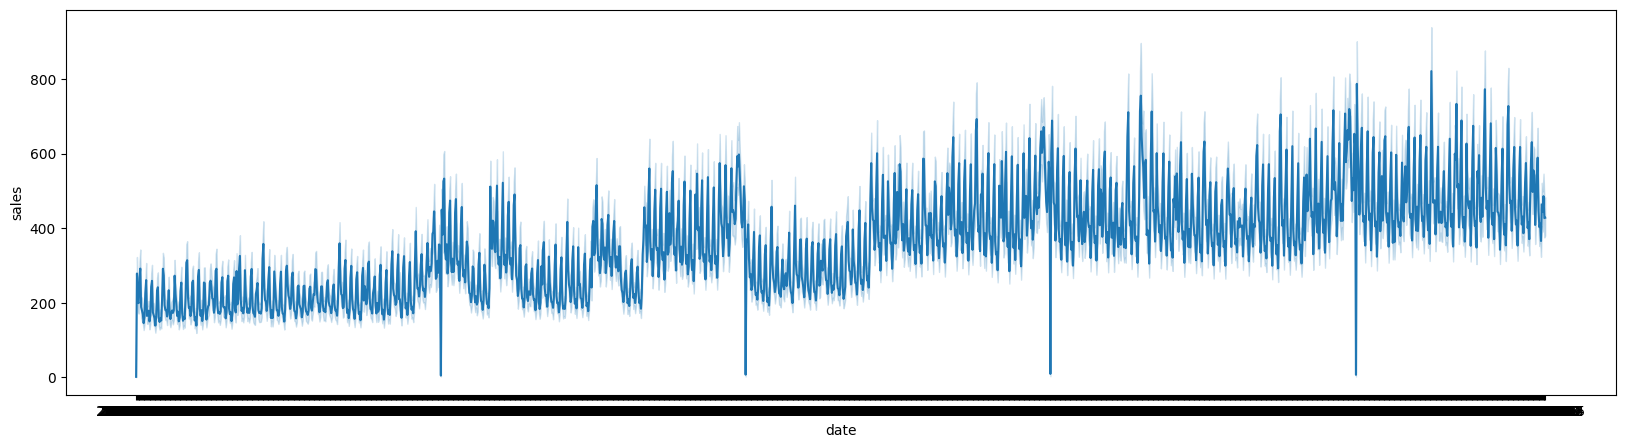

In [11]:
plt.figure(figsize=(20,5))
sns.lineplot(x='date',y='sales',data=train_data)

In [ ]:
plt.figure(figsize=(20,5))
sns.lineplot(x='date',y='sales',data=train_data)

In [13]:
from statsmodels.tsa.stattools import adfuller
adfuller(df['sales'],autolag='AIC')[1]

0.08969592175787444

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


<Figure size 2000x500 with 0 Axes>

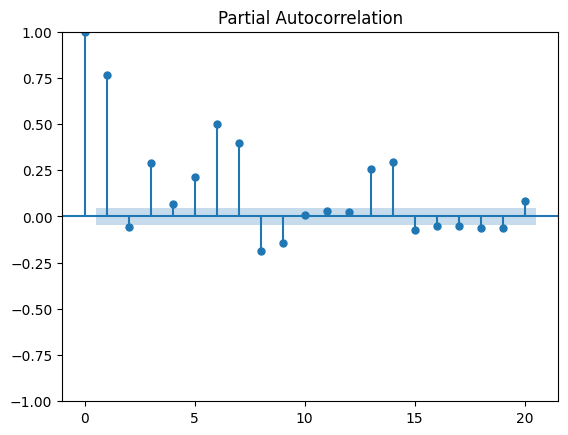

In [30]:
import statsmodels.graphics.tsaplots as tsa_plots
plt.figure(figsize=(20,5))
tsa_plots.plot_pacf(df['sales'],lags=20);

In [29]:
from statsmodels.tsa.stattools import acf,pacf

np.round(pacf(df['sales']),2)

array([ 1.  ,  0.77, -0.05,  0.29,  0.07,  0.21,  0.5 ,  0.4 , -0.19,
       -0.14,  0.01,  0.03,  0.02,  0.26,  0.3 , -0.08, -0.05, -0.05,
       -0.06, -0.06,  0.08,  0.11, -0.08, -0.07,  0.01,  0.01,  0.06,
        0.12,  0.14, -0.02,  0.03,  0.  , -0.01])

<Axes: xlabel='y(t)', ylabel='y(t + 14)'>

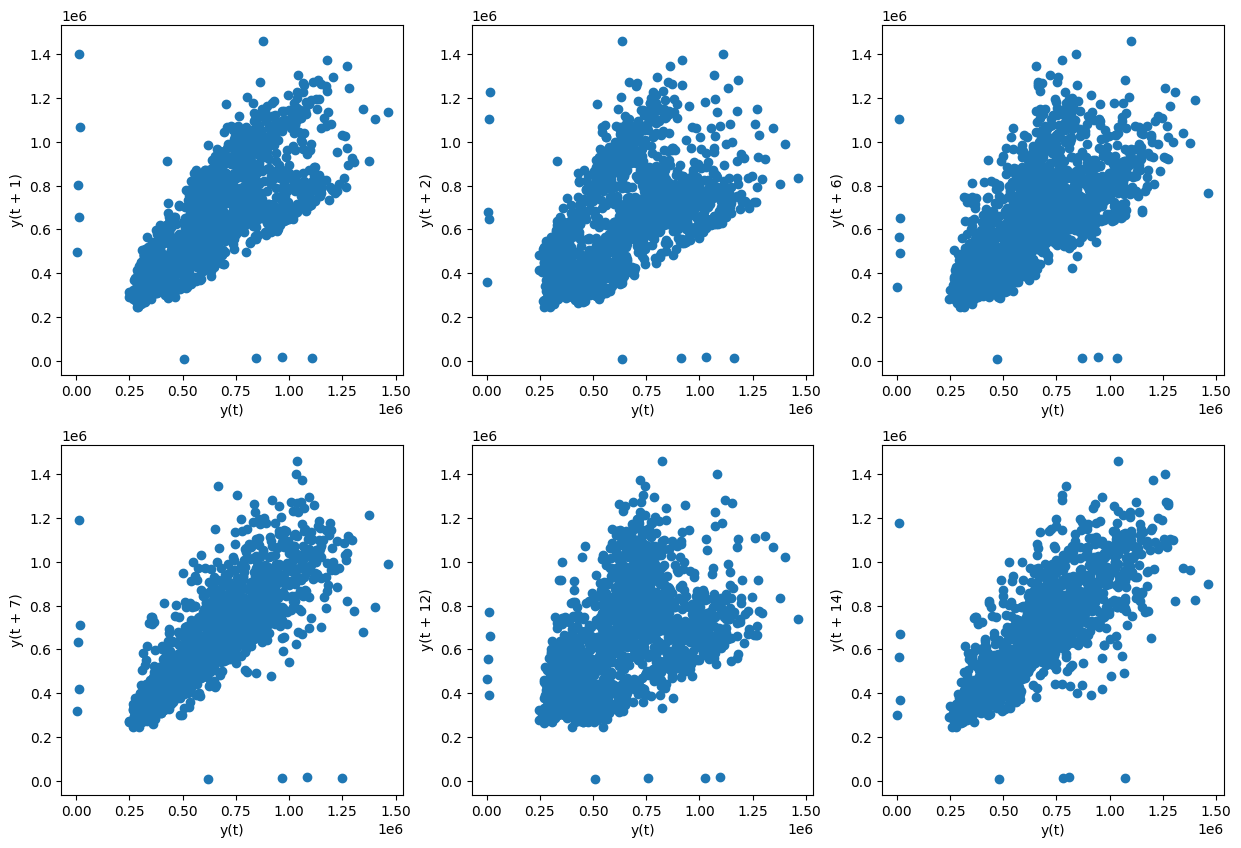

In [63]:
fig, axes = plt.subplots(nrows=2,ncols=3,figsize=(15,10))
pd.plotting.lag_plot(df['sales'], lag=1, ax=axes[0,0])
pd.plotting.lag_plot(df['sales'], lag=2, ax=axes[0,1])
pd.plotting.lag_plot(df['sales'], lag=6, ax=axes[0,2])
pd.plotting.lag_plot(df['sales'], lag=7, ax=axes[1,0])
pd.plotting.lag_plot(df['sales'], lag=12, ax=axes[1,1])
pd.plotting.lag_plot(df['sales'], lag=14, ax=axes[1,2])

<Axes: xlabel='date'>

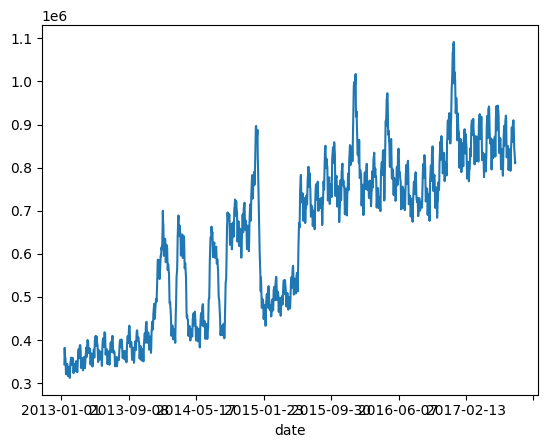

In [64]:
df['sales'].rolling(12).mean().plot()

In [46]:
from pmdarima import auto_arima

stepwise_fit = auto_arima(df['sales'],
                          start_p=1, start_q=1, max_p=3, max_q=3,
                          m=12, start_P=0, seasonal=True, d=None, D=1, trace=True,
                          error_action='ignore', suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=3.47 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=46054.639, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=45330.096, Time=2.09 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=2.32 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=46053.036, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=45802.700, Time=0.44 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=45076.336, Time=10.50 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=17.93 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=5.13 sec
 ARIMA(0,0,0)(2,1,0)[12] intercept   : AIC=45400.258, Time=13.19 sec
 ARIMA(2,0,0)(2,1,0)[12] intercept   : AIC=44914.096, Time=12.60 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=45045.048, Time=4.05 sec
 ARIMA(2,0,0)(2,1,1)[12] intercept   : AIC=inf, Time=19.44 sec
 ARIMA(2,0,0)(1,1,1)[12] intercept   : AIC=inf, Time=7.32 sec
 ARIMA(3,0,0)(2,1,0)[12] intercept  

In [48]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 1684
Model:             SARIMAX(3, 0, 2)x(2, 1, [1], 12)   Log Likelihood              -22235.092
Date:                              Mon, 24 Apr 2023   AIC                          44490.185
Time:                                      15:18:52   BIC                          44544.403
Sample:                                           0   HQIC                         44510.273
                                             - 1684                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1755.9246   2476.410      0.709      0.478   -3097.749    6609.599
ar.L1          0.2279      0.038      6.000      0.000       0.153       0.302
ar.L2         -0.6939      0.019    -36.091      0.000      -0.732      -0.656
ar.L3          0.6726      0.036     18.712      0.000       0.602       0.743
ma.L1          0.4064      0.023     17.977      0.000       0.362       0.451
ma.L2          0.9045      0.026     34.763      0.000       0.854       0.956
ar.S.L12      -0.0742      0.058     -1.281      0.200      -0.188       0.039
ar.S.L24      -0.4056      0.048     -8.422      0.000      -0.500      -0.311
ma.S.L12      -0.8861      0.033    -27.232      0.000      -0.950      -0.822
sigma2      3.796e+10      0.001   3.16e+13      0.000     3.8e+10     3.8e+10
===================================================================================
Ljung-Box (L1) (Q):                   1.06   Jarque-Bera (JB):              9910.98
Prob(Q):                              0.30   Prob(JB):                         0.00
Heteroskedasticity (H):               2.83   Skew:                             0.11
Prob(H) (two-sided):                  0.00   Kurtosis:                        14.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.88e+28. Standard errors may be unstable.
"""

In [49]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

arima_model = SARIMAX(df['sales'],order=(3,0,2),seasonal_order=(2,1,1,12))
arima_model = arima_model.fit()

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimi

In [57]:
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [55]:
start = len(train_data)
end = len(train_data)+len(test_data)-1
print(start,end)

3000888 3029399


In [58]:
pred_arima = arima_model.predict(start=3000888,end=3000892)

C:\Users\anike\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


MemoryError: Unable to allocate 34.0 GiB for an array with shape (39, 39, 2999209) and data type float64